1.- La empresa TIBASA(fabricante de tinas de baño) tiene asignado un camión especial para transporte de tinas terminadas. 
Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución  de probabilidad

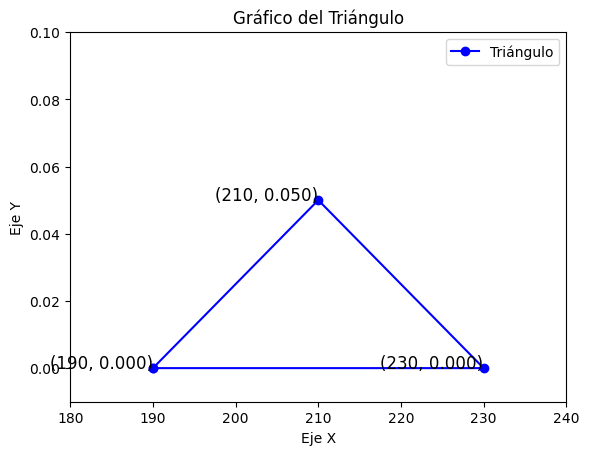

In [17]:
import matplotlib.pyplot as plt

 
vertices = [(190, 0), (210, 1/20), (230, 0)]

 
x, y = zip(*vertices)

 
x += (x[0],)
y += (y[0],)

 
fig, ax = plt.subplots()

 
ax.plot(x, y, 'bo-', label='Triángulo')

for i, (xi, yi) in enumerate(vertices):
    ax.text(xi, yi, f'({xi}, {yi:.3f})', fontsize=12, ha='right') 
ax.set_xlim(180, 240)
ax.set_ylim(-0.01, 0.10)

ax.legend()

# Mostrar el gráfico
plt.title('Gráfico del Triángulo')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


Si la capacidad del camión es de una tonelada, ¿cual es la probabilidad de que el peso de las tinas exceda la capicad del camión.
a)Resolver analiticamente
b)Resolver por simulación

De manera analitica, decimos que:
$$x_{i} \rightarrow T_{r1} (a,b,c)$$

condición:
$$x_{1} + x_{2} + x_{3} + x_{4} + x_{5} > 1000$$

Ahora especificamos $T_{r1}(a,b,c)$:
$$ f(x) = 
\begin{cases}
\frac{1}{400}(x - 190) & \text{si} 190 \leq x \leq 210 \\
-\frac{1}{400}(x - 230) & \text{si} 210 \leq x \leq 230
\end {cases}
$$

Una vez especificado, procedemos a sacar la esperanza($E(x)$) y la varianza ($var(x)$), las cuales definiremos como $\mu$ y $\sigma^2$

Para $\mu$:
$$ \mu = \int_{190}^{230} xf(x)dx = 210 $$

Para $\sigma^2$:
$$ \sigma^2 = \int_{190}^{230} (x - 20)^2 f(x) dx = 66.6 $$

Obteniendo estos datos, recordamos que queremos calcular $P(x_{1} + x_{2} + x_{3} + x_{4} + x_{5} > 1000)$

Usando el teorema central del limite:
$$ \lim_{ n \to \infty} P( \frac{x_{1} + ... + x_{n} - n\mu}{\sigma \sqrt{n}} < x) = \phi (x) $$

Reescribimos para $P(x_{1} + x_{2} + x_{3} + x_{4} + x_{5} > 1000)$:

$$ \frac{x_{1} + x_{2} + x_{3} + x_{4} + x_{5} - 5 \cdot 210}{\sqrt{\frac{200}{3}}\sqrt{5}} <  -2.73 $$

en donde $\frac{x_{1} + x_{2} + x_{3} + x_{4} + x_{5} - 5 \cdot 210}{\sqrt{\frac{200}{3}}\sqrt{5}} = z $.

Sustituyendo en el teormea:

$$ P( z < - 2.73 ) = \phi(-2.73) $$

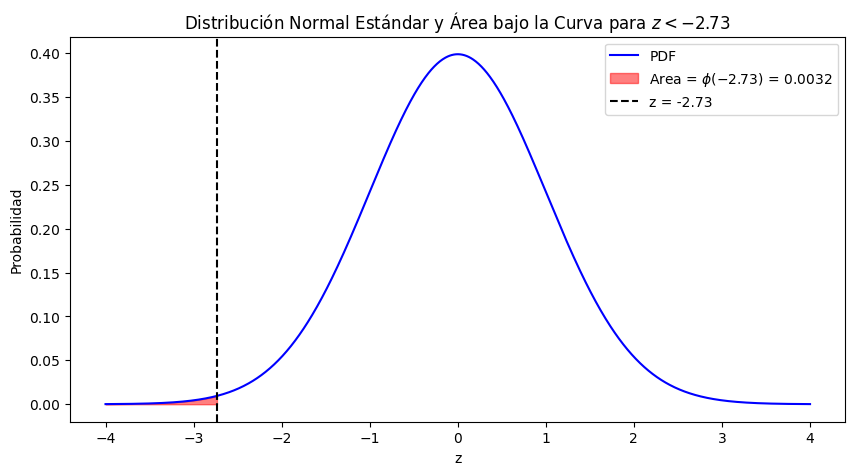

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

z_values = np.linspace(-4, 4, 1000)
pdf_values = norm.pdf(z_values)  
cdf_values = norm.cdf(z_values)  


z_critical = -2.73
cdf_critical = norm.cdf(z_critical)

fig, ax = plt.subplots(figsize=(10, 5))


ax.plot(z_values, pdf_values, label='PDF', color='blue')


ax.fill_between(z_values, pdf_values, where=(z_values <= z_critical), color='red', alpha=0.5, label=f'Area = $\phi(-2.73)$ = {cdf_critical:.4f}')


ax.axvline(z_critical, color='black', linestyle='dashed', label=f'z = {z_critical}')

ax.set_title('Distribución Normal Estándar y Área bajo la Curva para $z < -2.73$')
ax.set_xlabel('z')
ax.set_ylabel('Probabilidad')
ax.legend()


plt.show()


Ahora por simulación:

Primero calculamos F(x):
$$F(x) = \int_{-\infty}^{x} f(s) ds $$

lo que nos da como resultados:

$$ \frac{(x - 190)^2}{800}  \text{para} 190 \leq x \leq 210$$
$$ \frac{1 - (230 - x)^2}{800}  \text{para} 210 \leq x \leq $$

usando el metodo de la transformada inversa:

$$ F(x) = 
\begin{cases}
\frac{( x - 190 )^2}{800} & \text{si} 190 \leq x \leq 210 \\
\frac{ 1 - (230 - x)^2}{800} & \text{si} 210 \leq x \leq 230
\end {cases}
$$

Obtenemos que:
$$ x = 20\sqrt{2u} + 190 \text{si} 0\leq u\leq 1/2$$
$$ x = -20\sqrt{2(1-u)} +230 $$

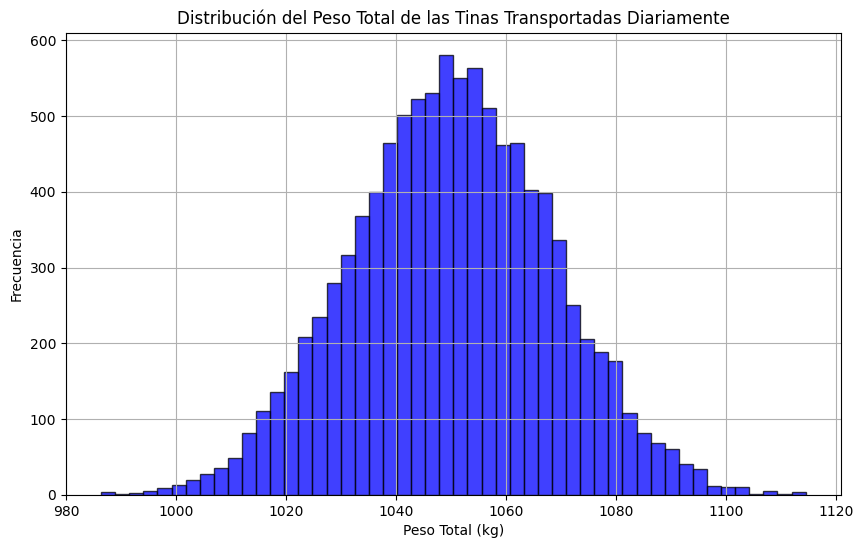

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a = 190  # límite inferior
c = 210  # modo
b = 230  # límite superior

# Función para simular el peso total de un día
def simulate_daily_load(num_tinas=5):
    return np.sum(np.random.triangular(a, c, b, size=num_tinas))

# Simulación de 10000 días para obtener una buena aproximación de la distribución
num_simulations = 10000
daily_loads = [simulate_daily_load() for _ in range(num_simulations)]

# Visualizar los resultados con un histograma
plt.figure(figsize=(10, 6))
plt.hist(daily_loads, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribución del Peso Total de las Tinas Transportadas Diariamente')
plt.xlabel('Peso Total (kg)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [22]:
import numpy as np

 
def generar_pesos_tinas(n):
     
    vertices = [(190, 0), (210, 1/20), (230, 0)]
    x, y = zip(*vertices)
    
    pesos_tinas = np.random.triangular(x[0], x[1], x[2], n)
    return pesos_tinas

 
capacidad_camion = 1

 
num_simulaciones = 100000


pesos_tinas_simulaciones = generar_pesos_tinas(num_simulaciones * 5)   

 
pesos_tinas_simulaciones = pesos_tinas_simulaciones.reshape(num_simulaciones, 5)

 
suma_pesos_simulaciones = np.sum(pesos_tinas_simulaciones, axis=1)

 
exceden_capacidad = np.sum(suma_pesos_simulaciones > capacidad_camion)

 
probabilidad_exceder = exceden_capacidad / num_simulaciones

print("Probabilidad de que el peso de las tinas exceda la capacidad del camión:", probabilidad_exceder)


Probabilidad de que el peso de las tinas exceda la capacidad del camión: 1.0


Datos:
Capacidad del camión: 10 tinas
Costo por tina enviada: $200
Costo promedio anual del camión: $60,000
Semanas del año: 52 semanas

In [23]:
import numpy as np
import scipy.stats as stats

mu = 180
sigma = 30
n = 5
capacidad_camion = 1000
mu_total = n * mu
sigma_total = np.sqrt(n) * sigma
z_score = (capacidad_camion - mu_total) / sigma_total
probabilidad_exceder = 1 - stats.norm.cdf(z_score)

print(f"probabilidad analitica de exceder la capacidad: {probabilidad_exceder: .4f}")



probabilidad analitica de exceder la capacidad:  0.0680


In [24]:
simulaciones =  10000
pesos = np.random.normal(mu , sigma , (simulaciones , n))
pesos_totales = np.sum(pesos , axis=1)
exceder_simulacion = np.sum(pesos_totales > capacidad_camion) / simulaciones
print(f"probabilidad por simulacion de exceder la capacidad: {exceder_simulacion:.4f}")

probabilidad por simulacion de exceder la capacidad: 0.0719


In [25]:
costo_extra_tina = 200
dias_trabajando_anual = 260
costo_anual_camion = 60000
costo_anual_extra = costo_extra_tina * dias_trabajando_anual * probabilidad_exceder
print(f"Costo anual esperado de enviar tinas extra : ${costo_anual_extra:.2f}")

Costo anual esperado de enviar tinas extra : $3536.97


In [26]:
costo_anual_extra_sim = costo_extra_tina * dias_trabajando_anual * exceder_simulacion
print(f"Costo anual esperado por simulacion de enviar tinas extra:${costo_anual_extra_sim:.2f}")

Costo anual esperado por simulacion de enviar tinas extra:$3738.80


In [27]:
if costo_anual_extra < costo_anual_camion:
  print("Es mas conveniente mantener el camion actual")
else:
  print("Es mas conveniente comprar un nuevo camion")

Es mas conveniente mantener el camion actual
